# 3.1 MNIST

- MNIST : 70000개의 숫자 이미지 데이터셋. 분류 알고리즘 학습에 많이 사용됨

In [1]:
#download MNIST
import sklearn
import sklearn.datasets
from sklearn.datasets import fetch_openml # python3.0부터는 mldata가 아닌 openml을 사용
import numpy as np

mnist=fetch_openml('mnist_784',version=1,cache=True)

In [2]:
X, y = mnist['data'], mnist['target'] 

In [3]:
y = y.astype(np.uint8)

In [4]:
# array 파악
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

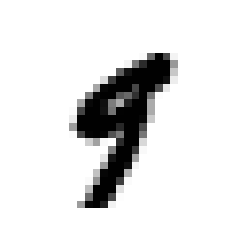

In [6]:
import matplotlib
import matplotlib.pyplot as plt

some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [7]:
y[36000]

9

In [8]:
X_train, X_test, y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
import numpy as np

shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

➔ 훈련 세트를 섞어서 모든 교차 검증 필드가 비슷해지게 함 (한 개의 fold에서도 특정 숫자가 누락되지 않게 해야 함)

# 3.2 이진 분류기 훈련

- 이진 분류기 ex) 5 분류기

In [10]:
# 타깃 벡터 생성
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=5, random_state=42)

sgd_clf.fit(X_train, y_train_5)

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

- [ SGDClassifier ] <br>
max_iter : The maximum number of passes over the training data.<br>
random_state : Used for shuffling the data, when shuffle is set to True. 

In [12]:
sgd_clf.predict([some_digit])

array([False])

# 3.3 성능 측정

## 3.3.1 교차 검증을 사용한 정확도 측정

* 교차 검증 구현

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3, random_state=42)

for train_index,test_index in skfolds.split(X_train, y_train_5):
    print(train_index) # 각 fold의 train set
    print(test_index) # 각 fold의 test set
    clone_clf=clone(sgd_clf) #모델 복사
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    print 
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[19994 19995 19996 ... 59997 59998 59999]
[    0     1     2 ... 20030 20033 20043]


C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.9493
[    0     1     2 ... 59997 59998 59999]
[19994 19995 19996 ... 40039 40040 40041]


C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.96375
[    0     1     2 ... 40039 40040 40041]
[39496 39501 39538 ... 59997 59998 59999]
0.9621


C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


* cross_val_score() 함수로 fold가 3개인 Kfold 교차검증으로 SGD 평가<br>
➔ 훈련 set을 3개로 나누고 각 fold에 대해 예측 후 평가 위해 나머지들로 훈련시킨 모델 사용

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3, scoring='accuracy')

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9493 , 0.96375, 0.9621 ])

In [15]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [16]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90995, 0.9073 , 0.9117 ])

## 3.3.2 오차 행렬

- 오차 행렬을 만들기 위해서 예측값 생성<br>
➔ test set은 분류 모델 완성 후 사용<br>
➔ 따라서 이 때는 cross_val_predict()로 예측

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cross_val_predict는 평가점수가 아닌 각 test fold에서 얻은 예측값을 반환

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred) #오차 행렬 생성

array([[54206,   373],
       [ 2124,  3297]], dtype=int64)

In [19]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions) #TP, TN만으로 만든 오차행렬

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## 3.3.3 정밀도와 재현률

- 오차 행렬의 성분<br>
1) 정밀도 : TP의 정확도 - TP/(TP+FP)<br>
2) 재현률=민감도=TPR : 분류기가 정확하게 감지한 TP의 비율 - TP/(TP+FN)<br>
3) F1 Score : 정밀도와 재현율의 조화평균 - 2×(정밀도×재현률)/(정밀도+재현률)

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) #정밀도

0.8983651226158038

In [21]:
recall_score(y_train_5, y_train_pred) # 재현률

0.6081903707802988

In [22]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7253327466725332

## 3.3.4 정밀도/재현율 트레이드오프

- SGD Classifier는 결정 함수를 이용해 각 샘플의 점수 계산<br>
➔ 임곗값보다 크고 작음으로 양성/음성을 구분하여 할당
<br><br>
- 사이킷런에서는 임곗값의 직접 지정은 불가능하나, 예측 점수는 확인 가능

In [23]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([-213061.26536423])

In [24]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

임곗값이 0보다 작으므로 False 반환

In [25]:
threshold=-250000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

임곗값이 0보다 크므로 True 반환

- 적절한 임곗값의 선정 방법<br>
➔ 훈련 세트의 모든 결정점수를 반환 후 임곗값에 대한 정밀도와 재현률 계산하여 판단

In [26]:
#결정점수 y_scores 반환
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5, cv=3, 
                           method='decision_function')

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [27]:
from sklearn.metrics import precision_recall_curve

precisions,recalls, thresholds=precision_recall_curve(y_train_5, y_scores)

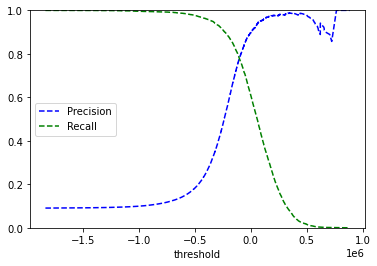

In [28]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label='Precision')
    plt.plot(thresholds,recalls[:-1],'g--',label='Recall')
    plt.xlabel('threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

- 정밀도 곡선이 울퉁불퉁한 이유 : <br>
➔ 임곗값을 올려도 정밀도가 낮아지는 경우가 있기 때문

(0.0, 1.0)

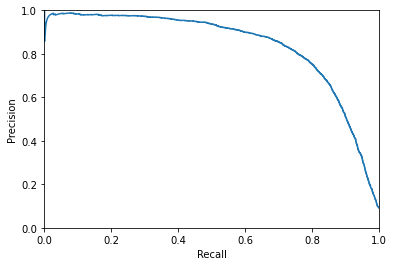

In [29]:
plt.plot(recalls[:-1],precisions[:-1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0,1])
plt.xlim([0,1])

In [30]:
#정밀도 90% 달성이 목표 시 임곗값은 약 0.2*10^6
y_train_pred_90=(y_scores>200000)
precision_score(y_train_5,y_train_pred_90)

0.9759217456734387

In [31]:
recall_score(y_train_5,y_train_pred_90)

0.23925475004611696

재현률이 너무 낮아 분류기가 유용하지 않은 상태

## 3.3.5 ROC 곡선

- ROC 곡선 : FPR(=1-TNR)에 대한 TPR의 곡선<br>
➔ ROC는 민감도에 대한 (1-특이도)의 그래프

In [32]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train_5, y_scores)

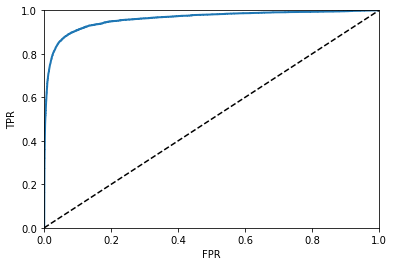

In [33]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
plot_roc_curve(fpr,tpr)
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9611766860902529

- RandomForestClassifier를 훈련시켜 SGDClassifier의 ROC AUC 점수 비교

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

ROC Curve에 사용해야 하기 때문에 양성 클래스에 대한 확률을 점수로 사용

In [36]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

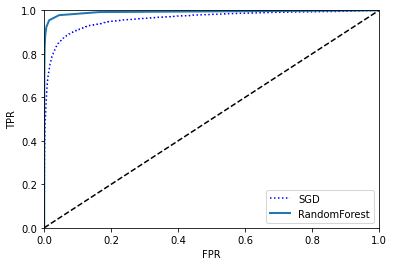

In [37]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'RandomForest')
plt.legend(loc='lower right')
plt.show()

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9924261800661413

# 3.4 다중 분류

 - SGD Classifier 적용

In [39]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([3], dtype=uint8)

- 각 클래스마다 분류시 산출된 점수 반환

In [40]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-854490.24640622, -529246.06230132, -681396.0492053 ,
         -99195.4025951 , -114760.99377185, -393464.20883934,
        -549467.36042824, -340957.44307297, -232309.78896944,
        -313200.39192918]])

In [41]:
np.argmax(some_digit_scores) #가장 큰 index 반환

3

In [42]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [43]:
sgd_clf.classes_[4]

4

- 사이킷런에서 OvO, OvA 강제 사용 위해 OneVsOneClassifier, OneVsRestClassifier 사용

In [45]:
#SGDClassifier기반으로 OvO전략 사용 다중 분류기
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(max_iter=5,random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

array([4], dtype=uint8)

In [46]:
len(ovo_clf.estimators_)

45

- OvO로 분류했기 때문에 45개의 결과값이 나옴

- Random Forest Classifier로 훈련

In [47]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([9], dtype=uint8)

In [48]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0.8]])

- 분류기 평가

In [49]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.8474, 0.8834, 0.8788])

- 스케일링을 통한 모델 정확도 향상

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.906 , 0.9068, 0.9114])

# 3.5 에러 분석

- 모델 성능 향상의 한 방법으로는 에러의 종류를 분석하여 해결책을 찾는 것

In [54]:
#오차행렬
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5730,    3,   18,   12,   14,   56,   41,   10,   37,    2],
       [   2, 6452,   51,   24,    6,   43,    7,   13,  134,   10],
       [  59,   36, 5314,  107,   78,   28,   93,   64,  165,   14],
       [  51,   41,  142, 5330,    3,  230,   30,   55,  148,  101],
       [  22,   26,   39,    7, 5359,   11,   48,   31,   76,  223],
       [  75,   40,   30,  178,   70, 4597,  106,   29,  202,   94],
       [  38,   22,   49,    2,   47,   90, 5613,    8,   48,    1],
       [  23,   20,   71,   31,   60,   11,    4, 5787,   14,  244],
       [  50,  160,   74,  155,   11,  160,   59,   27, 5013,  142],
       [  40,   29,   28,   82,  154,   38,    2,  198,   89, 5289]],
      dtype=int64)

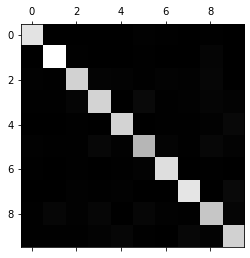

In [55]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

해석:<br>
- 오차 행렬이 주대각선에 있으므로 대부분의 이미지가 올바르게 분류되었다고 판단
- 숫자 5가 다른 숫자에 비해 어두워 보임 ➔ 숫자 5의 이미지가 적거나 분류기가 5를 다른 숫자보다 분류를 못함을 의미 (두 경우 모두 확인할 필요가 있음)

에러 비율 비교 : 오차행렬의 각 값을 대응 클래스의 이미지 개수로 나눔

In [59]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx=conf_mx/row_sums

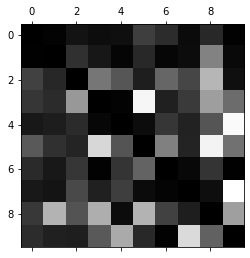

In [60]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

- 행 : 실제 클래스, 열 : 예측 클래스

1. class 8,9의 행과 열이 밝다 ➔ 8과 9로 많이 잘못 분류되고, 8,9가 다른 숫자로 많이 혼돈됨 <br>
2. class 1의 열은 매우 어두움 ➔ 대부분의 숫자 1이 정확하게 분류됨 <br>
3. 에러들이 정확하게 대칭이 아님<br>

➔ 오차 행렬의 분석으로 분류기의 성능 향상 방안에 대한 통찰을 얻을 수 있음

In [62]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

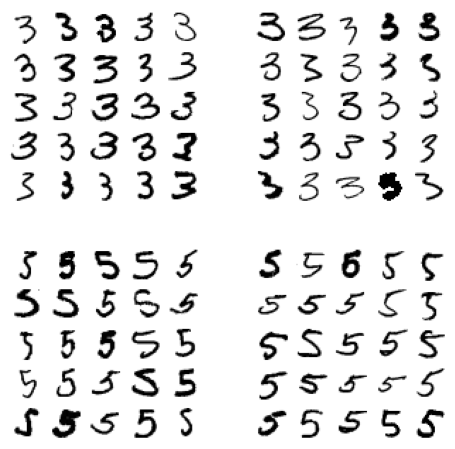

In [63]:
cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222);plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223);plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224);plot_digits(X_bb[:25],images_per_row=5)
plt.show()

# 3.6 다중 레이블 분류

- 다중 레이블 분류 시스템 : 여러 개의 이진 레이블 출력하는 분류 시스템

In [64]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>=7) #큰 값(7 이상)인가?
y_train_odd=(y_train%2==1) #홀수인가?
y_multilable=np.c_[y_train_large,y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilable)

KNeighborsClassifier()

In [65]:
knn_clf.predict([some_digit])

array([[ True,  True]])

- 다중 레이블 분류기의 성능 평가 : 각 Lable의 F1 점수의 평균값을 계산

In [ ]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilable,cv=3,n_jobs=-1)
f1_score(y_multilable,y_train_knn_pred,average='macro')

- 레이블 가중치가 같다고 가정 ( 가중치 있으면 weighted로 설정 후 출력 )

# 3.7 다중 출력 분류

In [ ]:
noise=rnd.radiant(0,100,len(X_train),784) #radiant로 픽셀 강도에 노이즈 추가
X_train_mod=X_train+noise
noise=rnd.radiant(0,100,len(X_train),784)
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

In [ ]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)